<a href="https://colab.research.google.com/github/BakhtiyDeveloper/Kitchen_classification_imajes_model/blob/main/Project_classification_kitchen_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Эта модель распознает и классифицирует изображения с помощью искусственного интеллекта.





С начало мы установим версию 2.5.3 библиотека Fastia 

библиотеки который нам нужны


1. torch==1.10.0+cu111 версия
2. fastai==2.5.3 версия 

In [1]:
!pip install fastai==2.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.9/881.9 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 106.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 81.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstal

Импортируем библиотека torch и fastai

In [40]:
import torch
import fastai
from fastai.vision.all import *
from ipywidgets import widgets

Проверим версия библиотеке (нам нужен библиотеке fastia именно версия 2.5.3


In [3]:
print(torch.__version__)
print(fastai.__version__)

1.10.2+cu102
2.5.3


клонируем репозитория от github

In [4]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 17.32 MiB/s, done.
Resolving deltas: 100% (146/146), done.


от репозитори #OIDv4_ToolKit с помощью файли **requirement.txt** установим нежный пакеты:

pandas

numpy

awscli

urllib3

tqdm

opencv-python

In [5]:
!cd OIDv4_ToolKit && pip install -r requirements.txt 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.1/630.1 KB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 99.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 7.2 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


Мы можем посмотрим какие действия можно выполнить через файл main.py

In [6]:
!cd OIDv4_ToolKit && python main.py -h

usage: main.py
       [-h]
       [--Dataset /path/to/OID/csv/]
       [-y]
       [--classes list of classes [list of classes ...]]
       [--type_csv 'train' or 'validation' or 'test' or 'all']
       [--sub Subset of human verified images or machine generated h or m)]
       [--image_IsOccluded 1 or 0]
       [--image_IsTruncated 1 or 0]
       [--image_IsGroupOf 1 or 0]
       [--image_IsDepiction 1 or 0]
       [--image_IsInside 1 or 0]
       [--multiclasses 0 (default or 1]
       [--n_threads [default 20]]
       [--noLabels]
       [--limit integer number]
       <command>
       'downloader',
       'visualizer'
       or
       'ill_downloader'.

Open Image
Dataset
Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
    'downloader
    ', 'visuali
    zer' or 'il
    l_downloade
    r'.

optional arguments:
  -h, --help
    show this
    help
    message and
    exit
  --Dataset /path/to/OID/csv/
    Directory
    of the OID
    data

Загружаем по 200 изображений из набора данных.

In [9]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content/Images_datas --classes Tableware Home_appliance Kitchen_appliance Kitchen_utensil --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Tableware.

Tableware
    [INFO] | Downloading train images.
    [INFO] | [INFO] Found 6084 online images for train.
    [INFO] | Limiting to 200 images.
    [INFO] | Download of 200 images in tra

Указываем путь набор данных

In [11]:
path = Path("/content/Images_datas/train")
path.ls()

(#5) [Path('/content/Images_datas/train/Kitchen utensil (Кухонная утварь)'),Path('/content/Images_datas/train/Tableware (Посуда)'),Path('/content/Images_datas/train/Home appliance (Бытовая техника)'),Path('/content/Images_datas/train/.ipynb_checkpoints'),Path('/content/Images_datas/train/Kitchen appliance (Кухонный прибор)')]

мы можем видеть, сколько изображений было загружено из набора данных

In [12]:
get_img = get_image_files(path)
get_img

(#800) [Path('/content/Images_datas/train/Kitchen utensil (Кухонная утварь)/b78c018e53dcd1aa.jpg'),Path('/content/Images_datas/train/Kitchen utensil (Кухонная утварь)/bfd17a576fdcac25.jpg'),Path('/content/Images_datas/train/Kitchen utensil (Кухонная утварь)/7ca9e5260a5885d4.jpg'),Path('/content/Images_datas/train/Kitchen utensil (Кухонная утварь)/7c1d4ba444d91d01.jpg'),Path('/content/Images_datas/train/Kitchen utensil (Кухонная утварь)/0053f8dc9abc7805.jpg'),Path('/content/Images_datas/train/Kitchen utensil (Кухонная утварь)/005817c1464729a7.jpg'),Path('/content/Images_datas/train/Kitchen utensil (Кухонная утварь)/fe88f63459353344.jpg'),Path('/content/Images_datas/train/Kitchen utensil (Кухонная утварь)/052f26fc9be3ad6f.jpg'),Path('/content/Images_datas/train/Kitchen utensil (Кухонная утварь)/77b1689bfa74aa9c.jpg'),Path('/content/Images_datas/train/Kitchen utensil (Кухонная утварь)/f0a7a2fc3499c7de.jpg')...]

проверяем, чтобы не было проблем с загрузкой изображений из датасета

In [13]:
fail_img = verify_images(path)
fail_img

'PosixPath' object is not iterable


(#0) []

Cоздаем блок данных

In [14]:
Kitchen_class = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)  
)

In [15]:
dls = Kitchen_class.dataloaders(path)

проверяем блок данныx 4 столбца и 8 строк

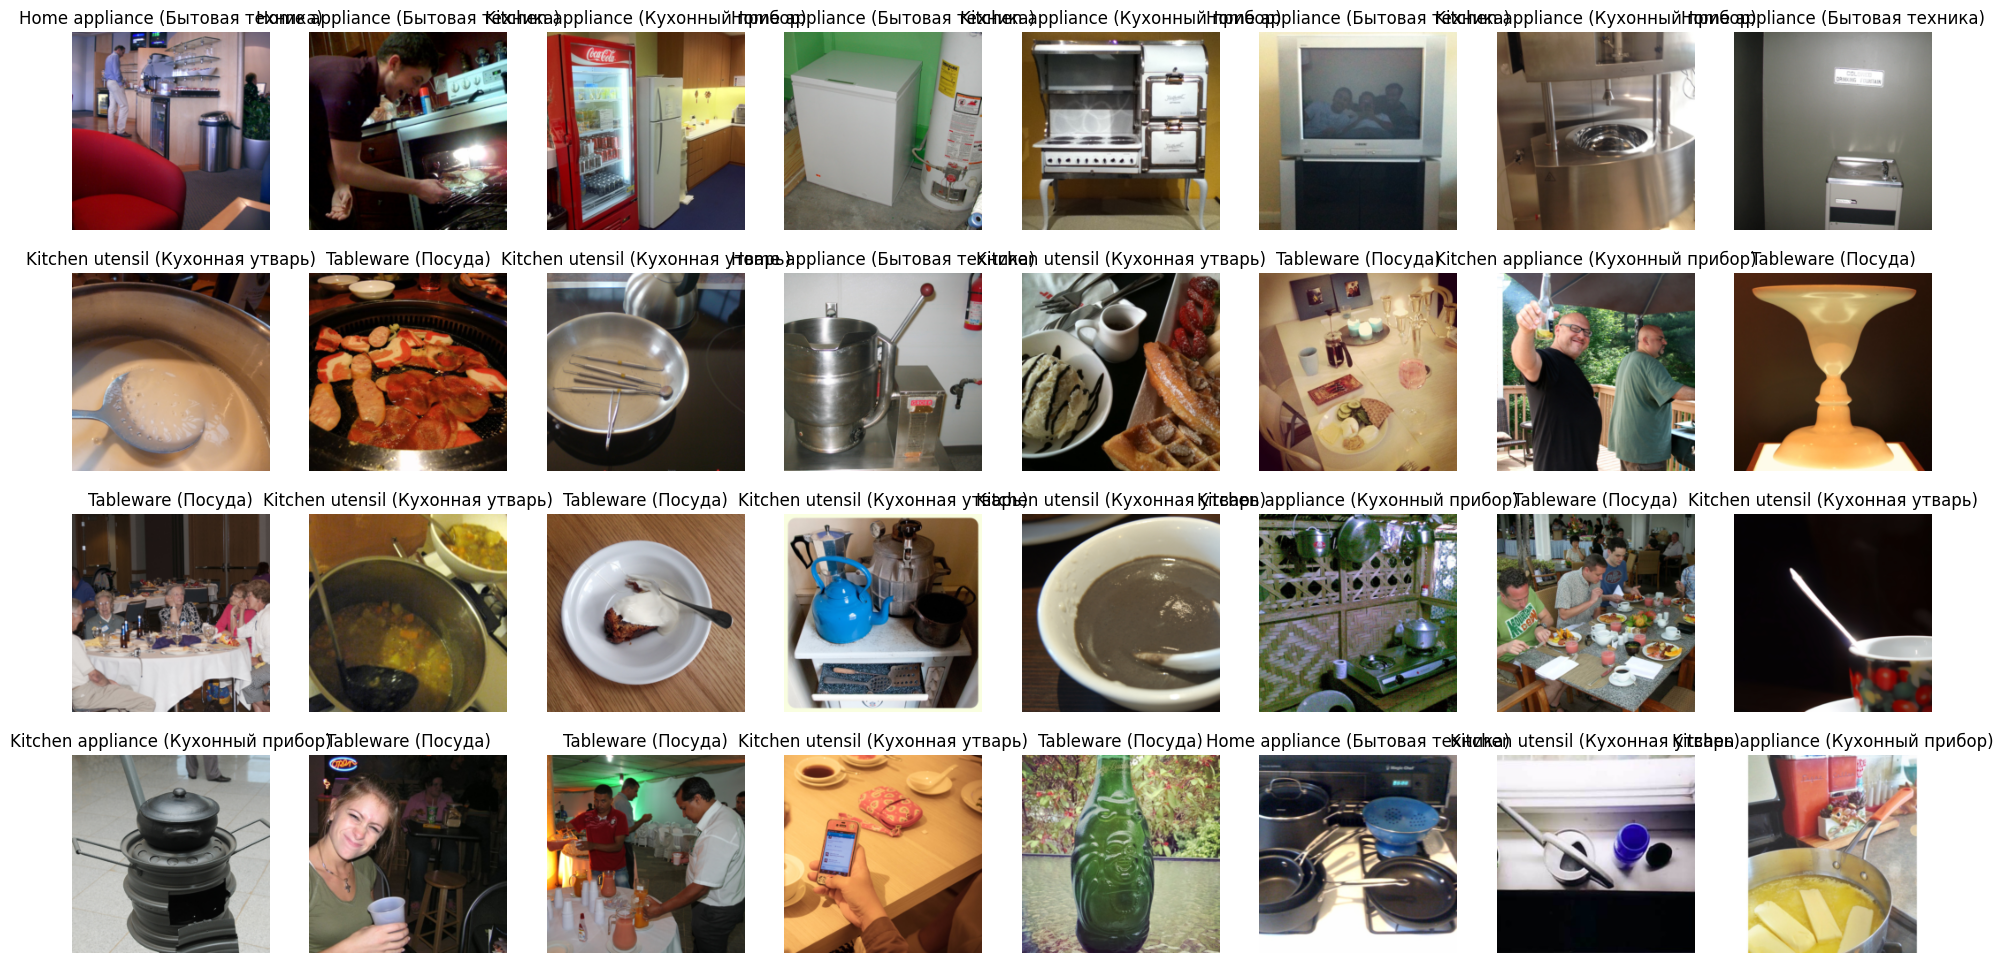

In [16]:
dls.train.show_batch(max_n=32, nrows=4)

обучаем модель 10 этопов и используем искусственной нейронной сеть модель resnet34 

In [18]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.901161,1.179670,0.600000,00:17


epoch,train_loss,valid_loss,accuracy,time
0,1.114986,1.096559,0.587500,00:18
1,0.957021,1.160989,0.575000,00:19
2,0.821695,1.335778,0.587500,00:18
3,0.714730,1.541192,0.568750,00:18
4,0.609117,1.568169,0.612500,00:18
5,0.521620,1.700216,0.612500,00:18
6,0.464390,1.721557,0.656250,00:18
7,0.407479,1.733051,0.625000,00:18
8,0.372757,1.723501,0.631250,00:18
9,0.337726,1.712034,0.625000,00:18


проверим модель что, сколько неправильных и сколько правильных предсказание делает модель

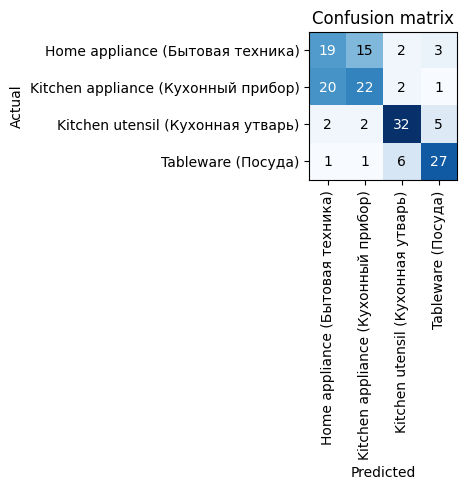

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

мы можем проверит предсказание, которое сделало модель самой большой

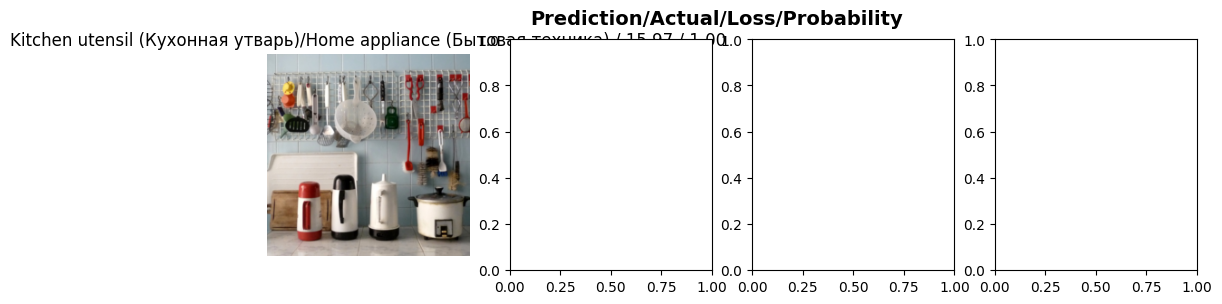

In [22]:
interp.plot_top_losses(4, nrows=1)

мы создадим кнопку загрузки

In [23]:
upload = widgets.FileUpload()
upload 

FileUpload(value={}, description='Upload')

загружаем изображении из интернета который применяется к нашим классам

Предсказания: Kitchen utensil (Кухонная утварь) 
Пероятность: 90.7%


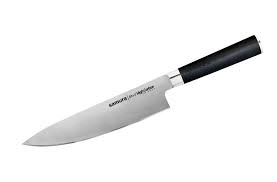

In [41]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
if probs[pred_id]*100 > 75:
  print(f"Предсказания: {pred} ")
  print(f"Пероятность: {probs[pred_id]*100:.1f}%")
else:
  print("Вы загружали изображении с ошибкой !!!! Пожалуйста, попробуйте с другим изображением")
img

сохраним модель

In [26]:
learn.export("Classification_kitchen_imges.pkl")

снова читаем модель

In [28]:
model = load_learner("/content/Classification_kitchen_imges.pkl")

In [32]:
upload = widgets.FileUpload()
upload 

FileUpload(value={}, description='Upload')

Предсказания: Kitchen utensil (Кухонная утварь) 
Пероятность: 90.7%


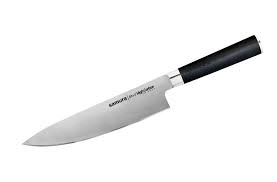

In [43]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = model.predict(img)
if probs[pred_id]*100 > 65:
  print(f"Предсказания: {pred} ")
  print(f"Пероятность: {probs[pred_id]*100:.1f}%")
else:
  print("Вы загружали изображении с ошибкой !!!! Пожалуйста, попробуйте с другим изображением")
img

In [38]:
model.predict(img)

('Home appliance (Бытовая техника)',
 TensorBase(0),
 TensorBase([0.8616, 0.1286, 0.0086, 0.0011]))